In [2]:
import warnings
warnings.filterwarnings('ignore')

from sklearn.datasets import fetch_california_housing

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


In [3]:
data = fetch_california_housing()

In [4]:
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

In [5]:
print(data.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per ce

In [6]:
df = pd.DataFrame(data.data, columns = data.feature_names)

In [7]:
df.head(2)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.02381,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.97188,2401.0,2.109842,37.86,-122.22


In [8]:
df['price'] = data.target

In [9]:
df.head(2)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,price
0,8.3252,41.0,6.984127,1.02381,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.97188,2401.0,2.109842,37.86,-122.22,3.585


In [10]:
df.isna().sum()

,0
MedInc,0
HouseAge,0
AveRooms,0
AveBedrms,0
Population,0
AveOccup,0
Latitude,0
Longitude,0
price,0


In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
MedInc,20640.0,3.870671,1.899822,0.499900,2.563400,3.534800,4.743250,15.000100
HouseAge,20640.0,28.639486,12.585558,1.000000,18.000000,29.000000,37.000000,52.000000
AveRooms,20640.0,5.429000,2.474173,0.846154,4.440716,5.229129,6.052381,141.909091
AveBedrms,20640.0,1.096675,0.473911,0.333333,1.006079,1.048780,1.099526,34.066667
Population,20640.0,1425.476744,1132.462122,3.000000,787.000000,1166.000000,1725.000000,35682.000000
AveOccup,20640.0,3.070655,10.386050,0.692308,2.429741,2.818116,3.282261,1243.333333
Latitude,20640.0,35.631861,2.135952,32.540000,33.930000,34.260000,37.710000,41.950000
Longitude,20640.0,-119.569704,2.003532,-124.350000,-121.800000,-118.490000,-118.010000,-114.310000
price,20640.0,2.068558,1.153956,0.149990,1.196000,1.797000,2.647250,5.000010


In [12]:
Q1 = np.quantile(df, 0.25)
Q3 = np.quantile(df, 0.75)


<Axes: >

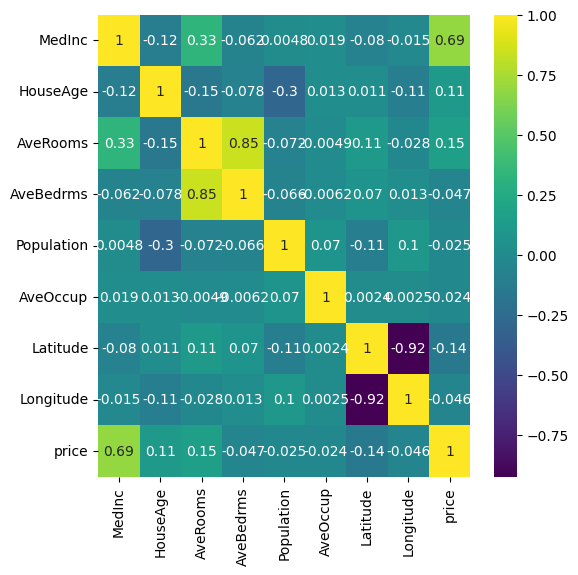

In [13]:
plt.figure(figsize=(6,6))
sns.heatmap(df.corr(), annot=True, cmap = 'viridis')

In [14]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [15]:
X.head(2)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.02381,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.97188,2401.0,2.109842,37.86,-122.22


In [16]:
y.head(2)

,price
0,4.526
1,3.585


In [17]:
X.shape, y.shape

((20640, 8), (20640,))

In [18]:
X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size = 0.35)

In [19]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((13416, 8), (7224, 8), (13416,), (7224,))

In [20]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [21]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score

ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)

Ridge()

In [22]:
y_pred = ridge.predict(X_test)

In [23]:
print("R2 Score:", r2_score(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

print("Coefficients:", ridge.coef_)

R2 Score: 0.6029964952434332
RMSE: 0.7256114771765412
Coefficients: [ 0.84083309  0.12214816 -0.24313748  0.26284454 -0.00223856 -0.04806365
 -0.90905249 -0.88460933]


In [25]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=0.01)
lasso.fit(X_train, y_train)
print(lasso.coef_)


[ 0.79637053  0.12766842 -0.14848207  0.16679405 -0.         -0.03735682
 -0.79532022 -0.76479444]


In [26]:
df.columns

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude', 'price'],
      dtype='object')

<br>
<br>

## **LASSO Regression**

In [27]:
from sklearn.linear_model import LassoCV
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

# Use LassoCV to automatically find the best alpha
lasso_cv = LassoCV(alphas=None, cv=5, max_iter=5000, random_state=42)
lasso_cv.fit(X_train, y_train)

# Best alpha chosen by cross-validation
print("Best alpha (Lasso):", lasso_cv.alpha_)

# Coefficients
print("Lasso coefficients:", lasso_cv.coef_)

# Predictions
y_pred_lasso = lasso_cv.predict(X_test)

# Model evaluation
print("R2 score (Lasso):", r2_score(y_test, y_pred_lasso))
print("RMSE (Lasso):", np.sqrt(mean_squared_error(y_test, y_pred_lasso)))


Best alpha (Lasso): 0.01829427882975405
Lasso coefficients: [ 0.7592994   0.13165642 -0.06988579  0.08684856  0.         -0.02834092
 -0.70104307 -0.66529407]
R2 score (Lasso): 0.5963297165466628
RMSE (Lasso): 0.7316786165617799


<br>
<br>

## **Elastic-Net Regression**

In [28]:
from sklearn.linear_model import ElasticNetCV

# Use ElasticNetCV to find best alpha and L1 ratio
elastic_cv = ElasticNetCV(l1_ratio=[0.1, 0.5, 0.7, 0.9, 1.0],  # 1.0 = Lasso, 0 = Ridge
                          alphas=None, cv=5, max_iter=5000, random_state=42)
elastic_cv.fit(X_train, y_train)

# Best parameters
print("Best alpha (ElasticNet):", elastic_cv.alpha_)
print("Best L1 ratio:", elastic_cv.l1_ratio_)

# Coefficients
print("ElasticNet coefficients:", elastic_cv.coef_)

# Predictions
y_pred_elastic = elastic_cv.predict(X_test)

# Model evaluation
print("R2 score (ElasticNet):", r2_score(y_test, y_pred_elastic))
print("RMSE (ElasticNet):", np.sqrt(mean_squared_error(y_test, y_pred_elastic)))


Best alpha (ElasticNet): 0.01829427882975405
Best L1 ratio: 1.0
ElasticNet coefficients: [ 0.7592994   0.13165642 -0.06988579  0.08684856  0.         -0.02834092
 -0.70104307 -0.66529407]
R2 score (ElasticNet): 0.5963297165466628
RMSE (ElasticNet): 0.7316786165617799


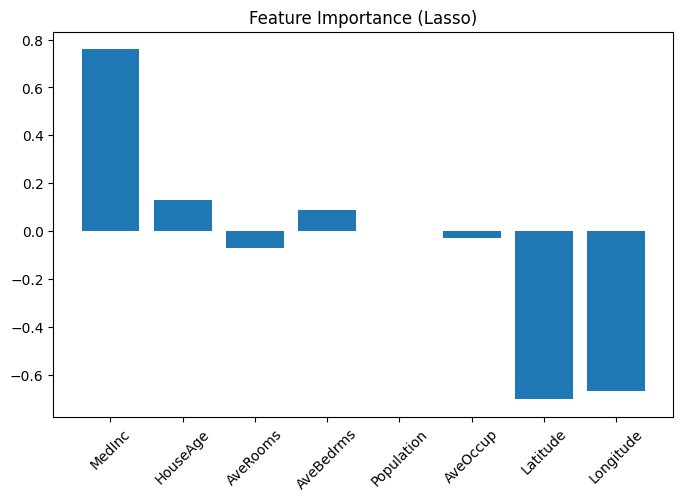

In [29]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.bar(range(len(lasso_cv.coef_)), lasso_cv.coef_)
plt.xticks(range(len(df.columns[:-1])), df.columns[:-1], rotation=45)
plt.title("Feature Importance (Lasso)")
plt.show()
